In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
train_trans=pd.read_csv("Train_trans.csv")

In [7]:
pd.set_option('display.max_columns', None)
train_trans.describe()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.00000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,16.274839,16.521473,16.277490,16.355560,-0.043389,-0.053018,25.800928,26.353566,25.903624,26.081865,-0.094954,-0.114908,0.590593,16.343948,26.082150,16.335808,26.060941,16.344470,26.081787,16.388272,26.127173,16.316412,26.064004,16.373961,26.116722,16.579331,26.561563,16.546822,26.510883,16.415961,26.238740,16.51461,26.382522,-0.108077,-0.100143,-0.089710,-0.118150,-0.039316,-0.038808,-0.047337,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,0.232123
std,15.374342,15.425769,15.305041,15.127922,0.776305,0.756452,29.243961,29.459305,29.269789,28.979008,1.270488,1.324785,0.491731,15.208344,29.158269,15.196279,29.138853,15.142292,29.048877,15.114650,28.896692,14.902038,28.612361,14.824743,28.402516,14.756009,28.364380,14.512375,27.859306,14.161609,27.130185,13.82671,26.413544,1.385724,1.373807,1.322031,1.375298,0.720808,0.787685,0.818200,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,0.422193
min,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.76000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111,0.000000
25%,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.900000,4.200000,4.900000,4.200000,4.900000,4.210000,4.920000,4.230000,4.940000,4.250000,4.960000,4.270000,4.98000,4.340000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068,0.000000
50%,5.770000,5.830000,5.780000,5.790000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,1.000000,5.810000,5.90

In [46]:
train_trans.shape

(40500, 52)

<h2>Test a few models</h2>

1. logistic
2. neural network
3. ensembling trees
4. knn
5. naive bayes
6. svm

In [8]:
X_train=train_trans.drop(["fail_7"],axis=1)
Y_train=train_trans["fail_7"]

In [9]:
# Load libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier




# Spot Check Algorithms
models = []


# Gaussian Naive Bayes
models.append(('NB', GaussianNB())) 


# Logistic regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

#KNN
models.append(('KNN',KNeighborsClassifier()))

#Kernalize SVM
models.append(('SVM',SVC()))

#GBDT
models.append(('GBDT', GradientBoostingClassifier(random_state=0)))


In [10]:
#pip install joblib
from joblib import parallel_backend

In [12]:
# evaluate each model in turn
#split into 5 for cross validation 

#For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
results = []
names = []
with parallel_backend('threading', n_jobs=-1):
    for name,model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)
        cv_results = cross_val_score(model, 
                                     X_train,
                                     Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

NB: 0.617852 (0.007503)
LR: 0.767778 (0.000547)
KNN: 0.727852 (0.005497)
SVM: 0.767877 (0.000049)
GBDT: 0.813086 (0.003567)


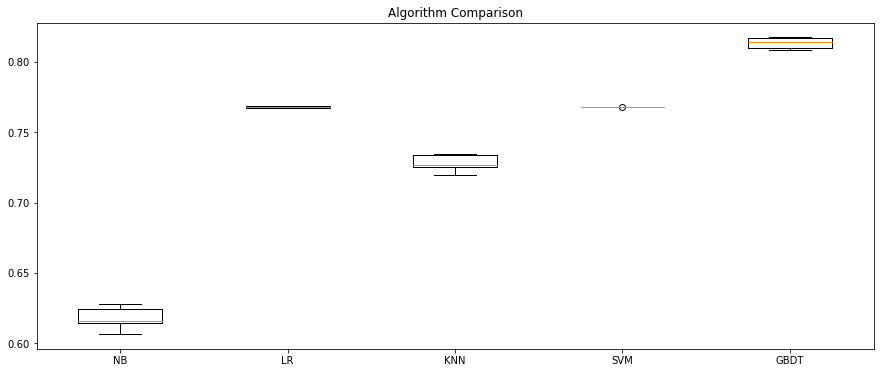

In [15]:
# Compare Algorithms
fig,ax = plt.subplots(figsize=(15,6))
ax.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show() 
#USE GBDT AS EVALUATION METHOD FOR NOW

<h2>Create methods to evaluate new features adding</h2>

1. cv score(USE THIS, GBDT CV SCORE for now)
2. aic, bic
3. feature importance rank

<h2>Quick Model Evaluation</h2>

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(rf,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [24]:
score_record

0.7979012345679013

In [32]:
p=train_trans.shape[1]
p

52

In [49]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=0,hidden_layer_sizes=[1])


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(mlp,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [50]:
score_record
#MLP only need 1 layer and of size 1 node to get 0.767, which is basically like logistic regression

0.7678765432098766

<h2>Graph time series</h2>

In [83]:
import re

In [95]:
def plot_by_group(pattern):
    match=[]
    names=[]
    for item in train_trans.columns:
        result = re.match(pattern, item)
        match.append(bool(result))
        if bool(result):
            names.append(item)
    group=train_trans[names]
    group.mean().plot(kind="line")
    plt.show()

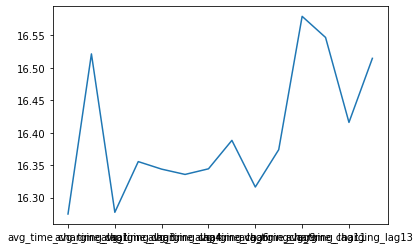

In [96]:
plot_by_group("^avg_time_charging_lag")

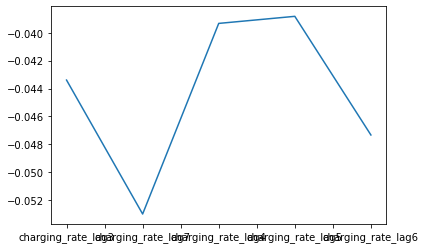

In [97]:
plot_by_group("^charging_rate_lag")

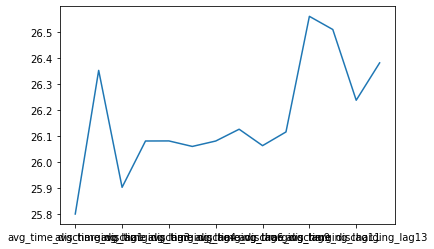

In [98]:
plot_by_group("^avg_time_discharging_lag")

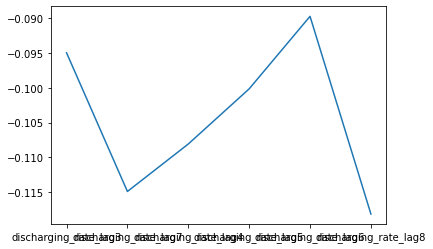

In [99]:
plot_by_group("^discharging_rate_lag")

<h2>feature engineering</h2>

In [100]:
train_trans.columns

Index(['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_disc

In [102]:
#start a new df for feature engineering
df_eng=train_trans

In [106]:
pattern=("^avg_time_charging_lag")
match=[]
names=[]
for item in train_trans.columns:
    result = re.match(pattern, item)
    match.append(bool(result))
    if bool(result):
        names.append(item)
names

['avg_time_charging_lag1',
 'avg_time_charging_lag2',
 'avg_time_charging_lag3',
 'avg_time_charging_lag7',
 'avg_time_charging_lag4',
 'avg_time_charging_lag5',
 'avg_time_charging_lag6',
 'avg_time_charging_lag8',
 'avg_time_charging_lag9',
 'avg_time_charging_lag10',
 'avg_time_charging_lag11',
 'avg_time_charging_lag12',
 'avg_time_charging_lag13',
 'avg_time_charging_lag14']

In [109]:
df_eng["test"]=0
for item in names:
    df_eng["test"]=df_eng["test"]+df_eng[item]
df_eng["test"]=df_eng["test"]/len(names)
df_eng["test"]

0        20.321286
1        18.247571
2        14.462143
3        15.245714
4        19.771429
           ...    
40495    13.792857
40496    18.573571
40497    14.123571
40498    14.321429
40499    18.780714
Name: test, Length: 40500, dtype: float64

In [110]:
df_eng["test"].equals(df_eng["avg_time_charging"])
#avg_time_charging!=avg of time series!

False

In [114]:
X_train_eng=df_eng.drop(['fail_7'],axis=1)



gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [115]:
score_record
#improved, can keep this

0.813283950617284

<h3>new feature testing process</h3>

use code block above,make new features to df_eng, if score is larger than 0.813086 of original GBDT, can keep it, 
otherwise, useless features,discard it

<h2>Several Ideas</h2>


1. average of each time series
2. charging_time*rate, same for discharge->total electricity charged/discharged
3. 